# DSCI 100 Group Project

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

# Title:

text here

## Intro:

Credit score is an important aspect of banking. Credit score will determine whether you will get approved on a bank loan, mortgage, or line of credit. Credit score can also affect how low your interest rates will be on your loan or how much money a bank will loan you. Credit score is a bank's way of putting a quantitative measure of an individual’s credit risk (likelihood for the individual to pay their bills on time). There are several factors that go into determining a person's credit score. Our proposal is to use real world data from a Kaggle data set, that has all sensitive information removed, to predict a person's credit score using regression analysis using these predictors: tenure, number of products purchased, bank balance, and age.  We have chosen the data set “https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/?select=Customer-Churn-Records.csv”. (idk how to link our data set into doc).
Data set Definitions
Tenure: Number of years an individual has been with the same bank.
NumOfProducts: How many products the client has purchased using the bank’s card.
Age: How old the individual is.
Balance: How much money an individual has in the bank.
CustomerId: Unique string of numbers to identify different clients.
Geography: What country the client is using the bank in.
HasCrCard: If the client has a credit card or not.



# Preliminary Data Analysis

text here

In [42]:
#Code Here
BankData <- read_csv("https://raw.githubusercontent.com/3deiuah/DSCI-100-Group-Project/main/Customer-Churn-Records.csv")  
colnames(BankData)[17] <- "CardType"
colnames(BankData)[18] <- "PointEarned"
BankData <- mutate(BankData,CardType = as_factor(CardType))
head(BankData) #Data set loaded into R, Data Set is already Tidy

Rows: 10000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Surname, Geography, Gender, Card Type
dbl (14): RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfPro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,CardType,PointEarned
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484


In [43]:
bank_split <- initial_split(BankData, prop = 0.75, strata = CreditScore)
bank_train <- training(bank_split)
bank_test <- testing(bank_split)

In [101]:

bank_table <- bank_train |> group_by(Geography) |> summarize(BalanceMean = mean(Balance))
counttest <- bank_train |> select(CardType) |> group_by(CardType) |> summarize(CardCount = n())

counttest
bank_table

CardType,CardCount
<fct>,<int>
DIAMOND,1883
GOLD,1885
SILVER,1890
PLATINUM,1840


Geography,BalanceMean
<chr>,<dbl>
France,62619.89
Germany,119788.85
Spain,61471.33


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


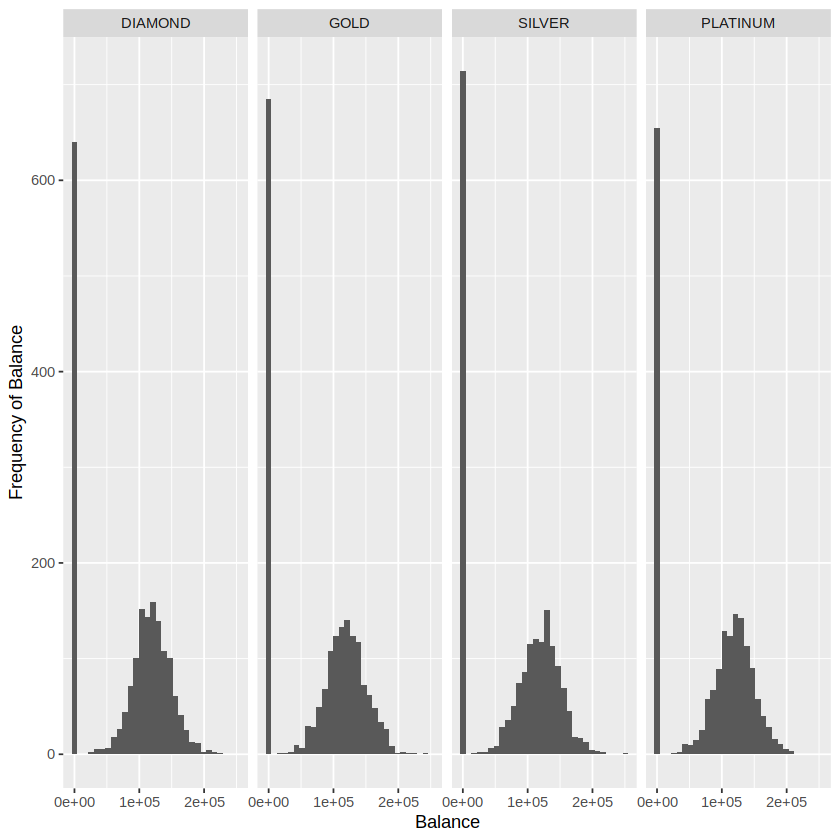

In [76]:
balancePlot <- bank_train |> ggplot(aes(x = Balance)) + geom_histogram() + facet_grid(cols = vars(CardType)) + ylab("Frequency of Balance")
balancePlot

Balance distributions are approximately equal across all Card Types


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


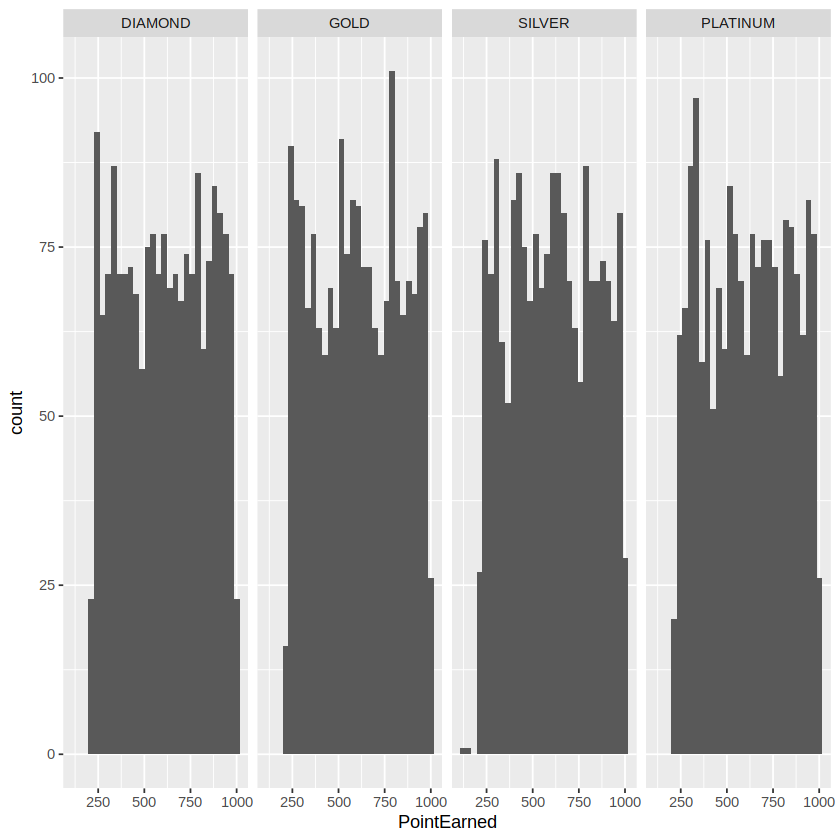

In [90]:
PointPlot <- bank_train |> ggplot(aes(x = PointEarned)) + geom_histogram() + facet_grid(cols = vars(CardType))
PointPlot

Point distributions are not equal across all Card Types


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


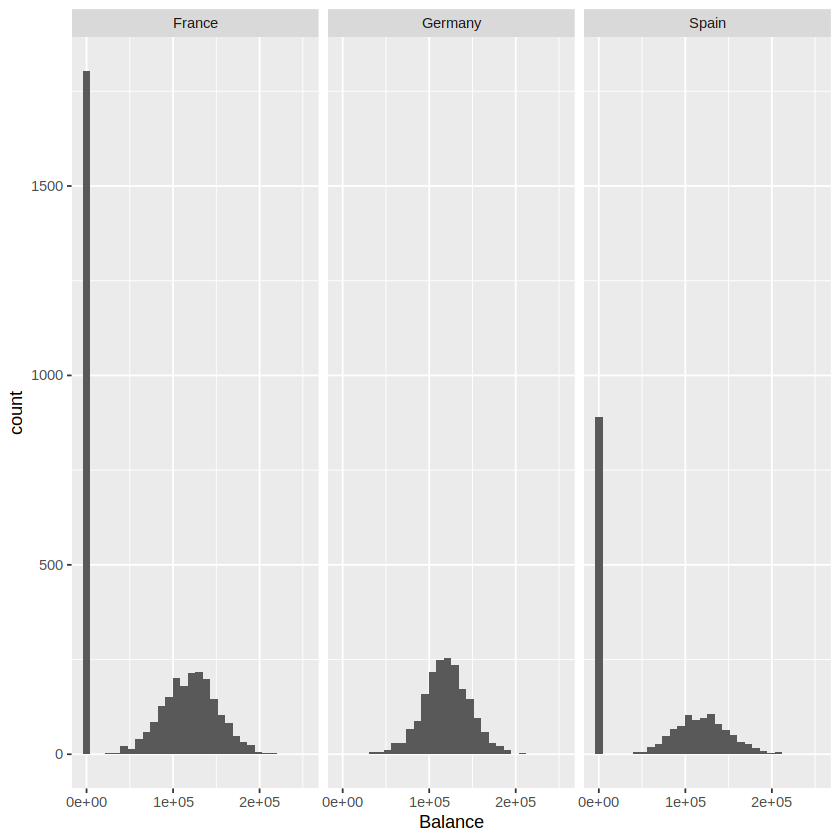

In [100]:
regionplot <- bank_train |> ggplot(aes(x = Balance)) + geom_histogram() + facet_grid(cols = vars(Geography))
regionplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


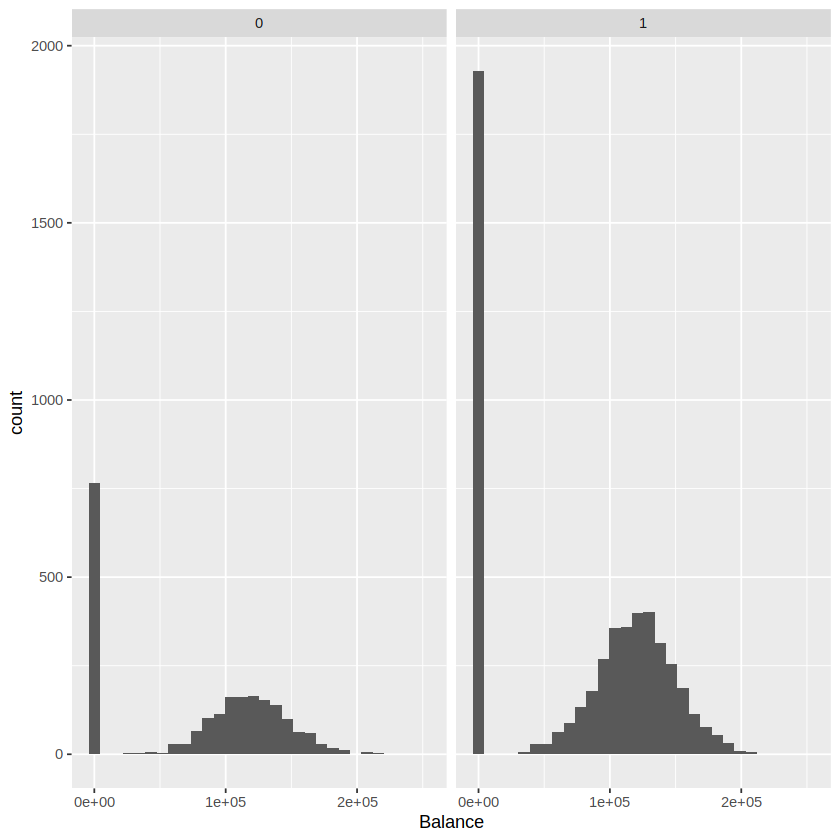

In [99]:
genderplot <- bank_train |> ggplot(aes(x = Balance)) + geom_histogram() + facet_grid(cols = vars(HasCrCard))
genderplot

# Methods

To predict a customer’s credit score, we will be using a regression model after filtering and scaling the columns; Bank balance, Number of products purchased, Tenure, and age. We decided not to use columns Surname, Geography, and Gender as we believe that is not relevant to predicting a customer's credit score and could introduce bias into the model. Utilizing non-relevant features can decrease the accuracy of our predictions and may lead to unfair assessments based on demographic factors. Our primary objective is to build a model that is both accurate and free from discriminatory practices, ensuring that all customers are evaluated based on financial behaviors and metrics that genuinely reflect their credit score

# Expected Outcomes and Significance

What do you expect to find?
Using a regression model, we aim to predict credit scores from bank balance, products purchased, tenure, and age to identify which variable most affects the score. The r coefficients will reveal these relationships.
What impact could this have?
For consumers, understanding these factors can guide loan application timing and credit improvement strategies. For instance, if age or tenure is pivotal, they might delay loan applications or maintain a longer bank relationship. Non-actionable factors like gender won't be analyzed. For banks, especially newer ones, this can streamline the approval process and prioritize low-risk applications.
What future questions arise?
Is the right weight given to each credit score variable? Can clients manipulate impactful factors? We'll discern between causation and correlation, like if more credit cards correlate with higher balances. Additionally, we might explore gender or regional biases in credit scores as a side project.